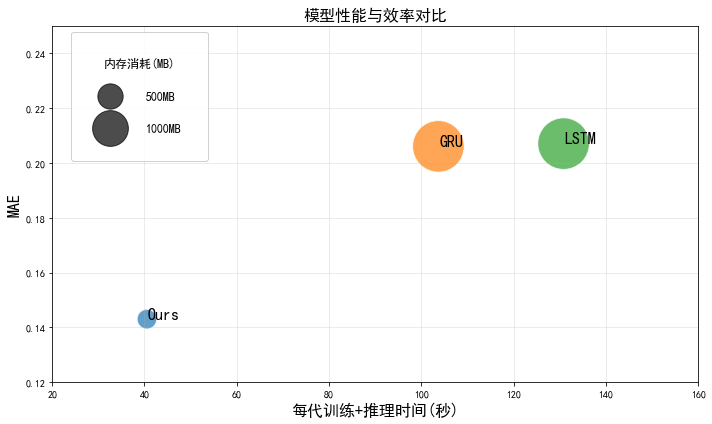

In [52]:
import matplotlib  
import matplotlib.pyplot as plt  
import pandas as pd  

# 设置中文字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 选择黑体  
matplotlib.rcParams['axes.unicode_minus'] = False    # 处理负号  

# Mock data - replace with your actual metrics  
models = {  
    "Ours": {  
        "mae": 0.143,   
        "time": 40.5317,  # Total training+inference time in minutes  
        "memory": 190.74  
    },  
    "GRU": {  
        "mae": 0.206,  
        "time": 103.6995,  
        "memory": 1326.65  
    },  
    "LSTM": {  
        "mae": 0.207,  
        "time": 130.8331,  
        "memory": 1326.49  
    }  
}  

# Convert to DataFrame  
df = pd.DataFrame(models).T.reset_index().rename(columns={'index':'Model'})  

# Create plot  
plt.figure(figsize=(10, 6))  
scatter = plt.scatter(  
    x=df['time'],  
    y=df['mae'],  
    s=df['memory'] * 2,  # Scale parameter count for point size  
    alpha=0.7,  
    c=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Different colors per model  
    edgecolors='w'  
)  

# Add labels and annotations  
plt.xlabel('每代训练+推理时间(秒)', fontsize=16)  
plt.ylabel('MAE', fontsize=16)  
plt.title('模型性能与效率对比', fontsize=16)  
plt.grid(True, alpha=0.3)  

plt.xlim(20, 160)  # 横轴范围 20-160  
plt.ylim(0.12, 0.25)  # 纵轴范围 0.12-0.25  

# Add legend for point sizes  
kw = dict(prop="sizes", num=3, fmt="{x:.0f}MB",   
          func=lambda s: s / 2,   
)  # Reverse scaling for legend  
legend2 = plt.legend(*scatter.legend_elements(**kw),  
                     title="内存消耗(MB)",   
                     title_fontsize=12,    # 标题字号  
                     fontsize=12,          # 标签字号  
                     markerscale=0.8,      # 点的大小缩放比例  
                     frameon=True,         # 显示边框  
                     borderpad=2.2,        # 边框内边距  
                     handletextpad=2,      # 文字与点的间距  
                     labelspacing=1.8,     # 增加行间距  
                     framealpha=0.9,       # 调整边框透明度使间距更明显  
                     loc="upper right",  
                     bbox_to_anchor=(0.25, 1))  

# Add model labels with adjusted font size  
for i, row in df.iterrows():  
    plt.annotate(row['Model'],   
                 (row['time'] + 0.2, row['mae']),  
                 fontsize=16)  # 调整字体大小为12，避免超出范围  

plt.tight_layout()  
plt.show()  